In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

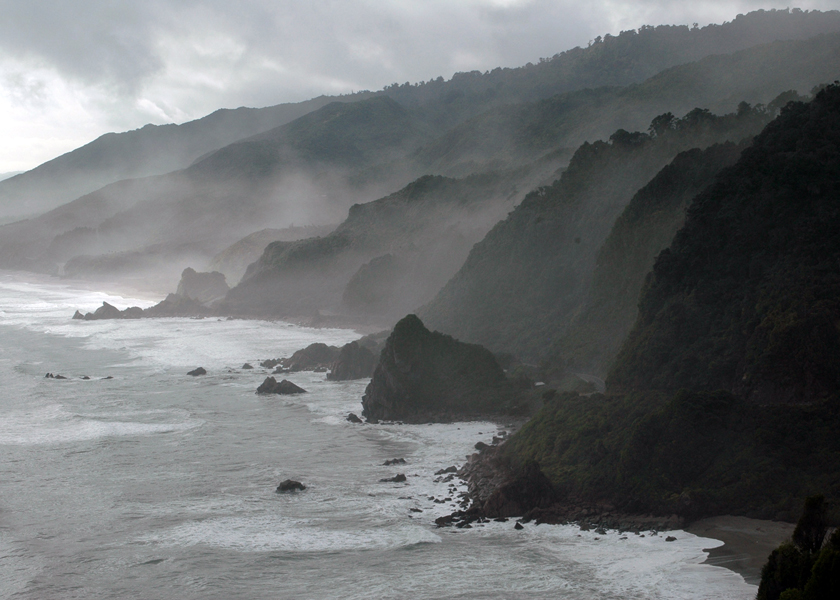

In [6]:
#Original Image
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#Display 18x18 pixel image
Image(filename="New_Zealand_Coast.jpg")

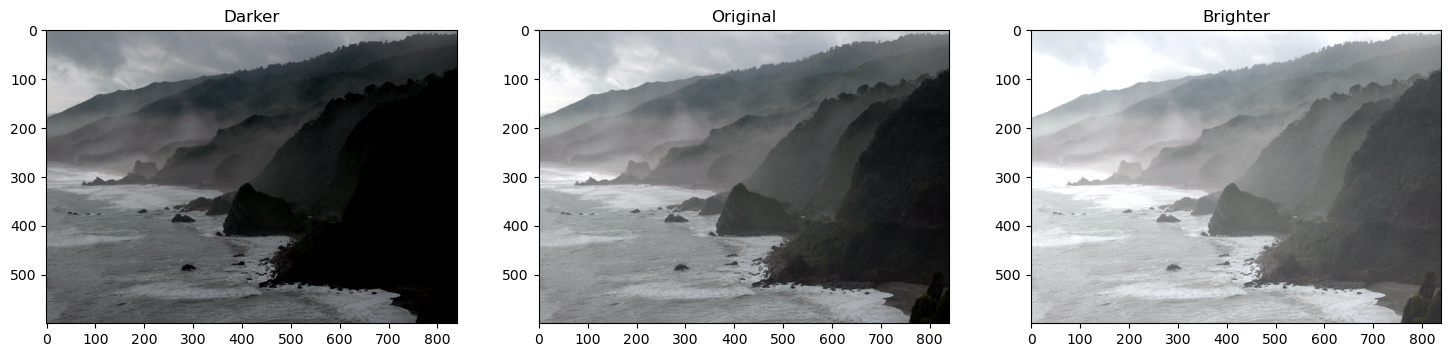

In [7]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

#Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");

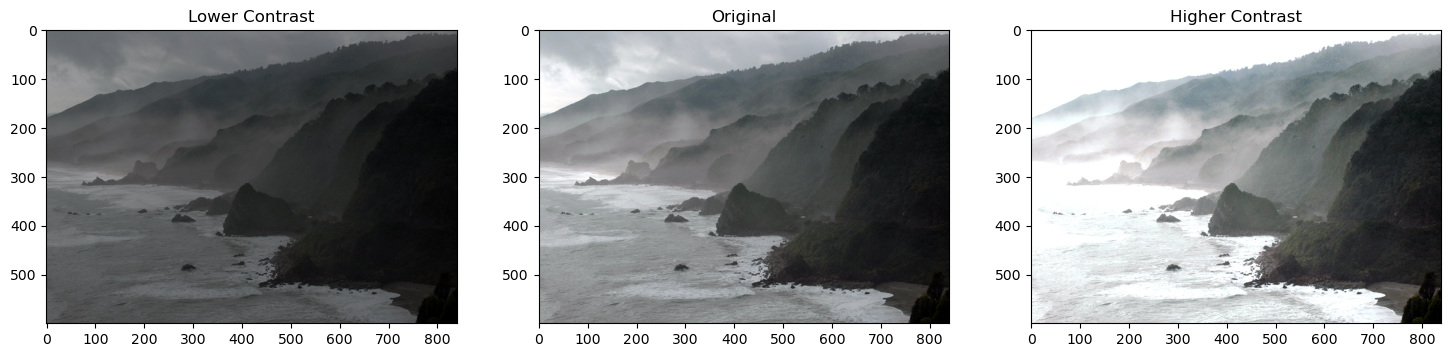

In [10]:
#Multiplication or Contrast
matrix1 = np.ones(img_rgb.shape) * 0.6
matrix2 = np.ones(img_rgb.shape) * 1.6

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher =np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

#show the image
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);  plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

(572, 800)


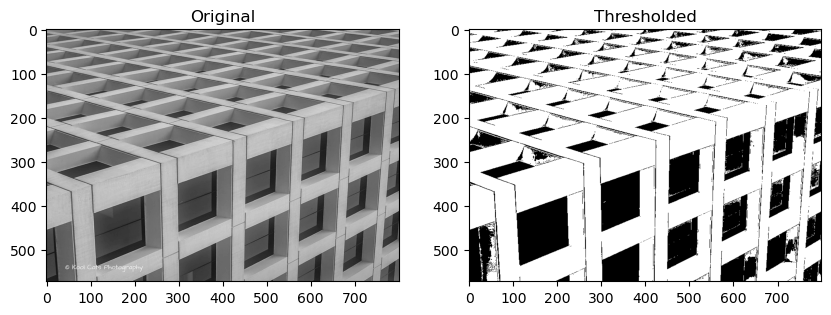

In [14]:
#Image Thresholding
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

#Show images
plt.figure(figsize=[10,5])

plt.subplot(121);plt.imshow(img_read, cmap='gray'); plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap='gray'); plt.title("Thresholded")

print(img_thresh.shape)

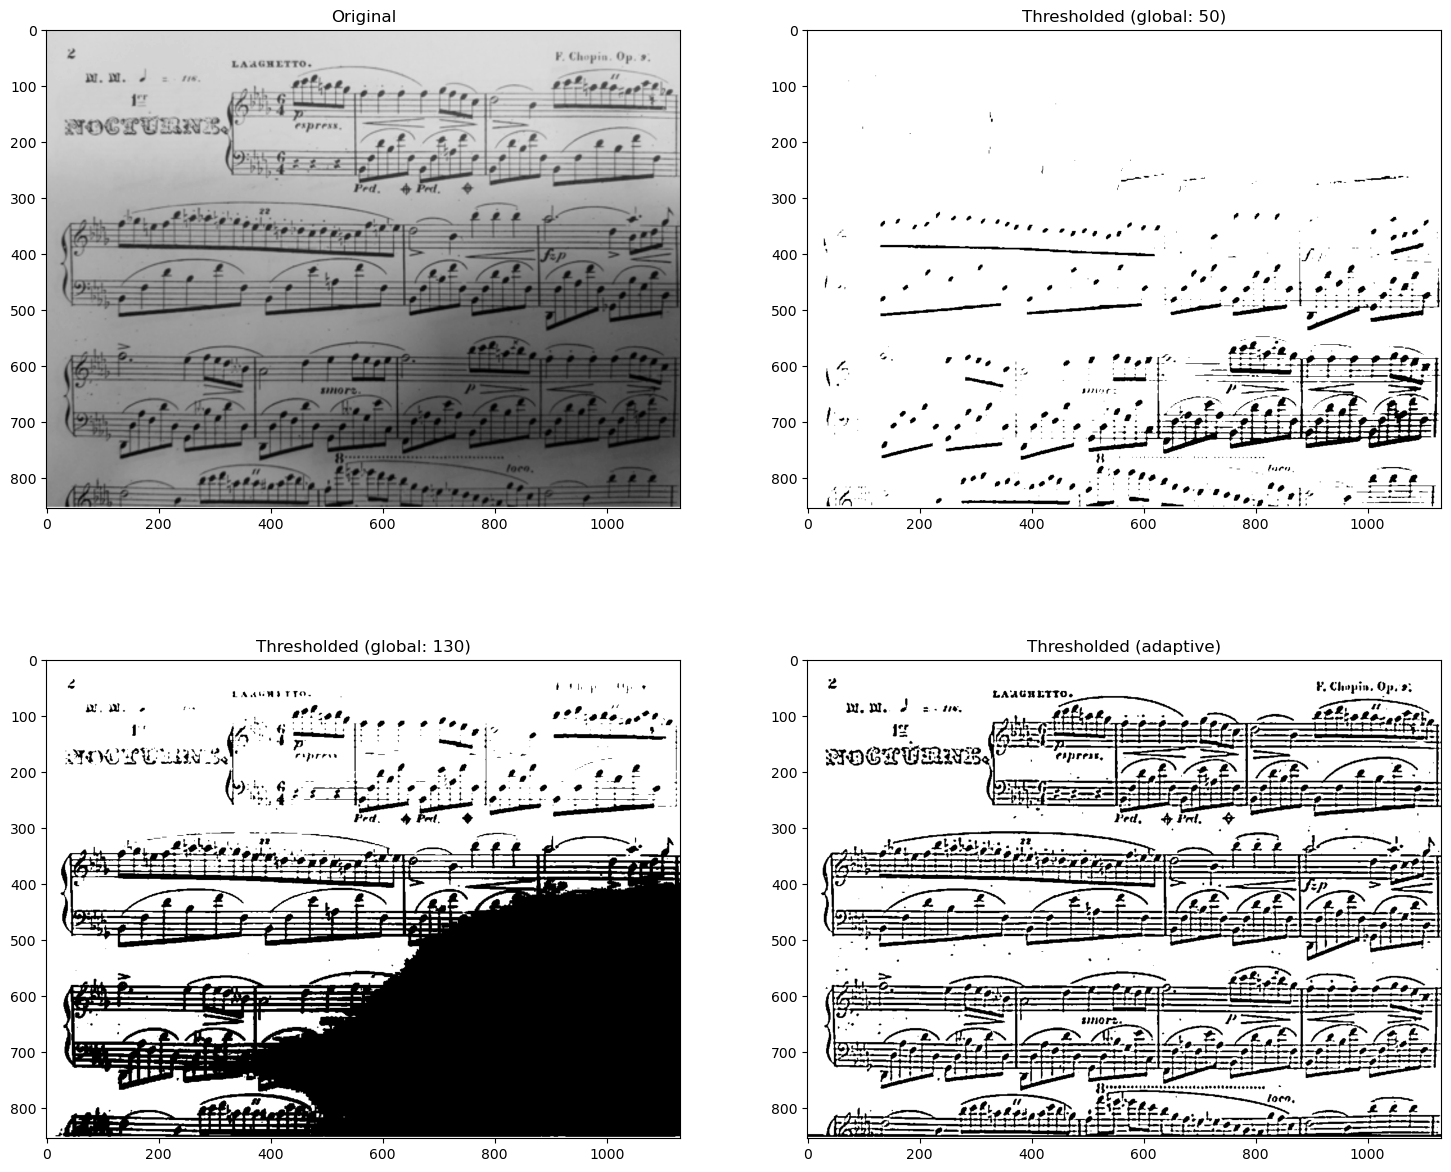

In [25]:
#Application: Sheet Music Reader
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

#Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

#Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

#Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize = [18,15])
plt.subplot(221); plt.imshow(img_read, cmap='gray'); plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray"); plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");                                                                    

(200, 499)


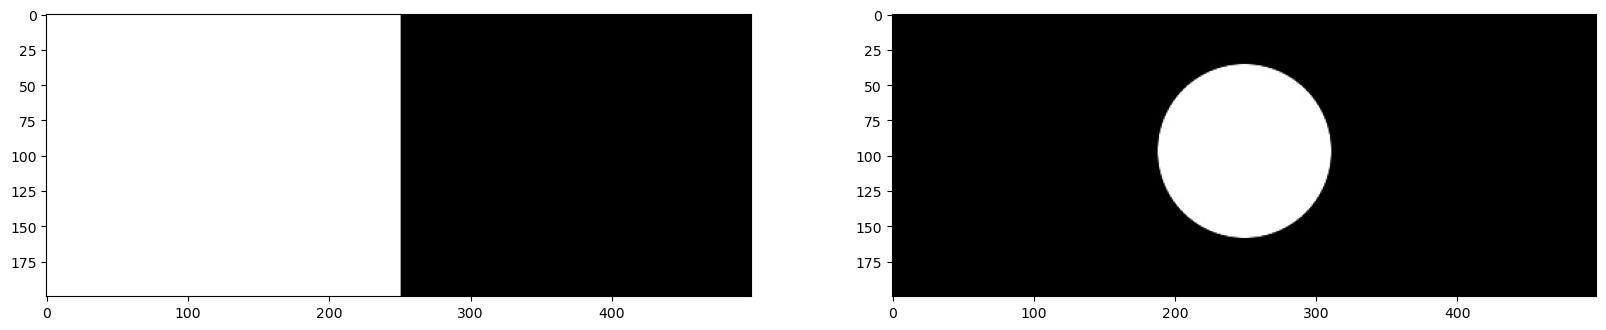

In [26]:
#Bitwise Operators
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

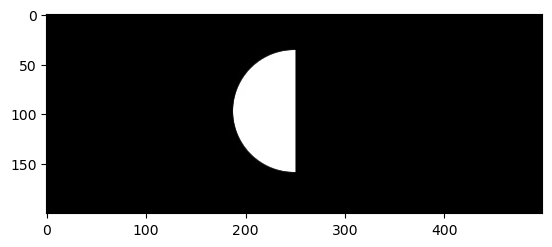

In [30]:
#Bitwise AND operator
result = cv2.bitwise_and(img_rec, img_cir, mask= None)
plt.imshow(result, cmap = "gray")

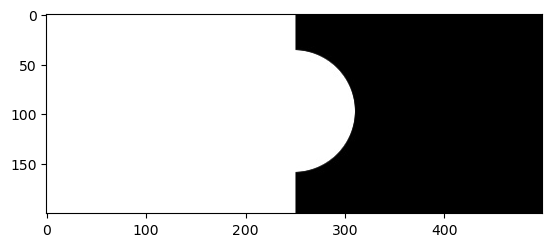

In [32]:
#Bitwise OR operator
result = cv2.bitwise_or(img_cir, img_rec, mask=None)
plt.imshow(result, cmap="gray")


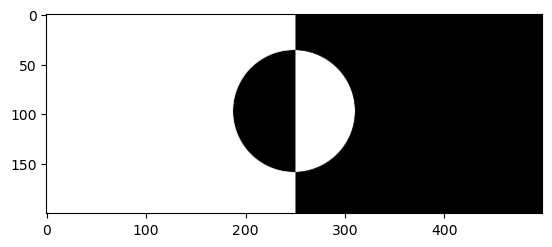

In [33]:
#Bitwise XOR Operator
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

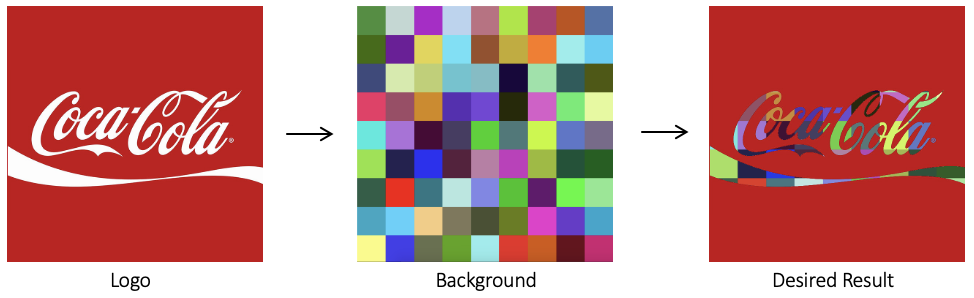

In [34]:
#Application: Logo Manipulation
Image(filename='Logo_Manipulation.png')

(700, 700, 3)


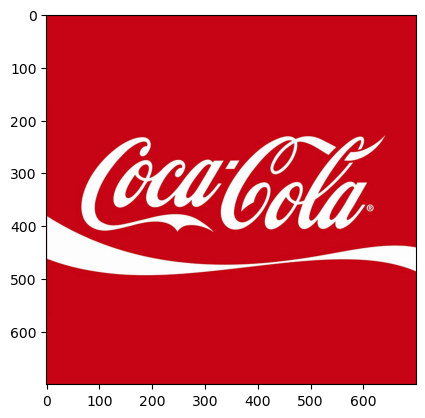

In [35]:
img_bgr = cv2.imread('coca-cola-logo.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)

logo_w=img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


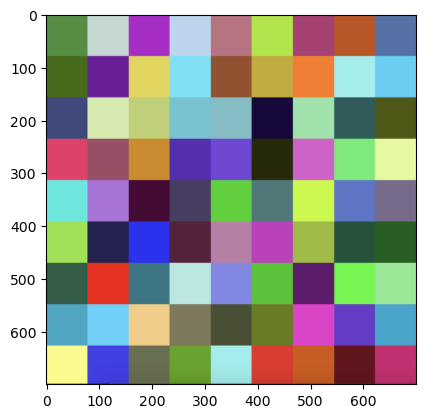

In [36]:
img_background_bgr = cv2.imread('checkerboard_color.png')
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)



(700, 700)


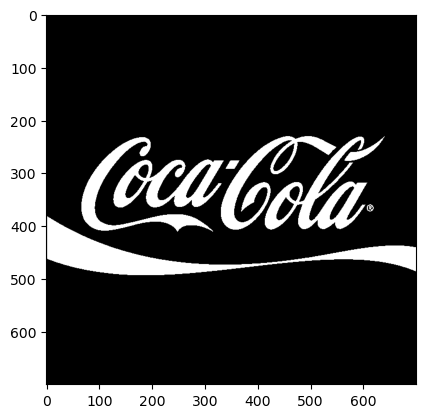

In [38]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

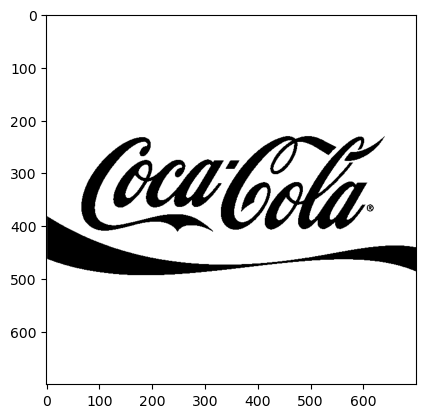

In [39]:
img_mask_inv =cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

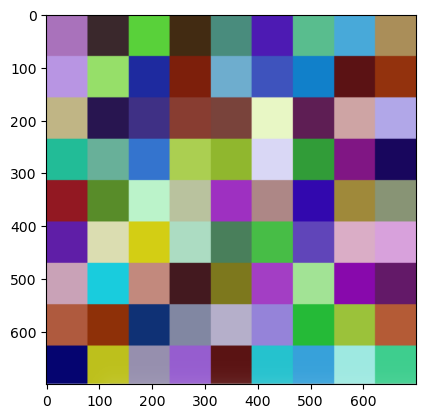

In [40]:
img_background_rgb_invert = cv2.bitwise_not(img_background_rgb)
plt.imshow(img_background_rgb_invert)

In [55]:
img_background_rgb_invert = cv2.bitwise_and(img_background_rgb_rgb_invert, img_background_rgb_rgb_invert, mask=img_mask)
plt.imshow(img_background)

NameError: name 'img_background_rgb_rgb_invert' is not defined

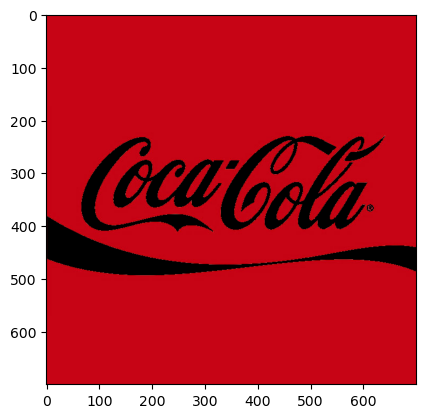

In [51]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

In [54]:
result=cv2.add(img_background_rgb_invert, img_foreground_rgb_invert)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])

NameError: name 'img_foreground_rgb_invert' is not defined